<a href="https://colab.research.google.com/github/vishal894/Fashion-MNIST-with-Keras/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


TIMEOUT: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_images='/content/drive/My Drive/Colab Notebooks/fashion/fashion-mnist_train.csv'
test_images='/content/drive/My Drive/Colab Notebooks/fashion/fashion-mnist_test.csv'




In [3]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=6c7a15bfe323b047c89dbeb34e7fa43ceb3f4a1733aba957bffb9fb79ec28b80
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=6ca2f1ef6a32327a17baece851b52b251c4a2e5ce3a00b88f26259edfb1645ad
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
train_images = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion/fashion-mnist_test.csv')
test_images = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion/fashion-mnist_test.csv')

In [6]:
train_data = np.array(train_images, dtype='float32')
test_data = np.array(test_images, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [7]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [8]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [9]:
from kerastuner import RandomSearch

In [10]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [11]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
225/225 [==============================] - 1s 6ms/step - loss: 0.6745 - accuracy: 0.7610 - val_loss: 0.4588 - val_accuracy: 0.8413
Epoch 2/3
225/225 [==============================] - 1s 5ms/step - loss: 0.3932 - accuracy: 0.8611 - val_loss: 0.4267 - val_accuracy: 0.8475
Epoch 3/3
225/225 [==============================] - 1s 5ms/step - loss: 0.3125 - accuracy: 0.8864 - val_loss: 0.3917 - val_accuracy: 0.8612


Epoch 1/3
225/225 [==============================] - 2s 8ms/step - loss: 1.1377 - accuracy: 0.6753 - val_loss: 0.5870 - val_accuracy: 0.7675
Epoch 2/3
225/225 [==============================] - 2s 7ms/step - loss: 0.5587 - accuracy: 0.7885 - val_loss: 0.5773 - val_accuracy: 0.8037
Epoch 3/3
225/225 [==============================] - 2s 7ms/step - loss: 0.4873 - accuracy: 0.8103 - val_loss: 0.4841 - val_accuracy: 0.8175


Epoch 1/3
225/225 [==============================] - 1s 7ms/step - loss: 1.0096 - accuracy: 0.6885 - val_loss: 0.6131 - val_accuracy: 0.7862
Epoch 2/3
225/225 [==============================] - 1s 6ms/step - loss: 0.5621 - accuracy: 0.8032 - val_loss: 0.5556 - val_accuracy: 0.7825
Epoch 3/3
225/225 [==============================] - 1s 6ms/step - loss: 0.4868 - accuracy: 0.8189 - val_loss: 0.5128 - val_accuracy: 0.8275


Epoch 1/3
225/225 [==============================] - 2s 7ms/step - loss: 1.2054 - accuracy: 0.7008 - val_loss: 0.6278 - val_accuracy: 0.7750
Epoch 2/3
225/225 [==============================] - 1s 7ms/step - loss: 0.5300 - accuracy: 0.8025 - val_loss: 0.5891 - val_accuracy: 0.8087
Epoch 3/3
225/225 [==============================] - 2s 7ms/step - loss: 0.4567 - accuracy: 0.8275 - val_loss: 0.4664 - val_accuracy: 0.8263


Epoch 1/3
225/225 [==============================] - 1s 6ms/step - loss: 0.8706 - accuracy: 0.7093 - val_loss: 0.5334 - val_accuracy: 0.7975
Epoch 2/3
225/225 [==============================] - 1s 5ms/step - loss: 0.4871 - accuracy: 0.8147 - val_loss: 0.4442 - val_accuracy: 0.8338
Epoch 3/3
225/225 [==============================] - 1s 5ms/step - loss: 0.4299 - accuracy: 0.8349 - val_loss: 0.4470 - val_accuracy: 0.8363


INFO:tensorflow:Oracle triggered exit


In [12]:
model=tuner_search.get_best_models(num_models=1)[0]

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        27680     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,209,002
Trainable params: 1,209,002
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
225/225 [==============================] - 1s 6ms/step - loss: 0.2409 - accuracy: 0.9118 - val_loss: 0.3807 - val_accuracy: 0.8788
Epoch 2/10
225/225 [==============================] - 1s 5ms/step - loss: 0.1807 - accuracy: 0.9308 - val_loss: 0.4006 - val_accuracy: 0.8737
Epoch 3/10
225/225 [==============================] - 1s 5ms/step - loss: 0.1399 - accuracy: 0.9488 - val_loss: 0.4327 - val_accuracy: 0.8687
Epoch 4/10
225/225 [==============================] - 1s 5ms/step - loss: 0.1076 - accuracy: 0.9600 - val_loss: 0.4703 - val_accuracy: 0.8763
Epoch 5/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9715 - val_loss: 0.5341 - val_accuracy: 0.8775
Epoch 6/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0534 - accuracy: 0.9817 - val_loss: 0.5680 - val_accuracy: 0.8800
Epoch 7/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0438 - accuracy: 0.9847 - val_loss: 0.6851 - val_accuracy: 0.8550
Epoch 

In [18]:
import matplotlib.pyplot as plt

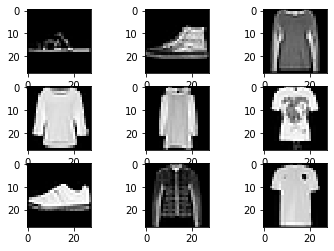

In [19]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')

In [21]:
score=model.evaluate(x_test,y_test,verbose=0)

In [22]:
score

[0.2207241654396057, 0.9613999724388123]

In [23]:
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2207
Test Accuracy : 0.9614


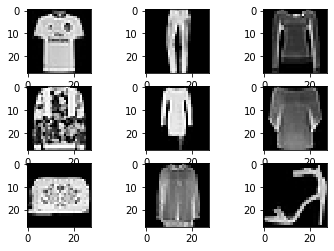

In [24]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')

In [25]:
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2207
Test Accuracy : 0.9614
